In [1]:
from typing import Annotated
import operator,json
from typing import TypedDict, Annotated, Sequence
from typing_extensions import TypedDict
from langchain_core.messages import BaseMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import StateGraph,END,START
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition
from langchain_core.tools import tool
from langchain_community.tools.tavily_search import TavilySearchResults

In [2]:
from langchain_groq import ChatGroq
llm=ChatGroq(model_name="Gemma2-9b-It")

In [4]:
llm.invoke("hi").content


'Hi! 👋\n\nWhat can I do for you today? 😊\n'

In [5]:

@tool
def multiply(first_number:int, second_number:int)->int:
    """multiply two integer number"""
    return first_number * second_number

In [6]:
multiply({"first_number":24,"second_number":364})


C:\Users\PREET\AppData\Local\Temp\ipykernel_22124\2402252026.py:1: LangChainDeprecationWarning: The method `BaseTool.__call__` was deprecated in langchain-core 0.1.47 and will be removed in 1.0. Use :meth:`~invoke` instead.
  multiply({"first_number":24,"second_number":364})


8736

In [7]:
multiply.invoke({"first_number":24,"second_number":364})


8736

In [8]:
@tool
def search(query:str):
    """perform the web search on the user query"""
    tavily=TavilySearchResults()
    result=tavily.invoke(query)
    return result

In [9]:
search("who is a current president of USA?")


C:\Users\PREET\AppData\Local\Temp\ipykernel_22124\1922640126.py:4: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tavily=TavilySearchResults()


[{'title': 'Presidents, vice presidents, and first ladies | USAGov',
  'url': 'https://www.usa.gov/presidents',
  'content': 'The 47th and current president of the United States is Donald John Trump. He was sworn into office on January 20, 2025.',
  'score': 0.88372874},
 {'title': 'President of the United States - Ballotpedia',
  'url': 'https://ballotpedia.org/President_of_the_United_States',
  'content': 'The current President of the United States is Donald Trump (R). Trump assumed office in 2025.',
  'score': 0.8747745},
 {'title': 'President of the United States - Wikipedia',
  'url': 'https://en.wikipedia.org/wiki/President_of_the_United_States',
  'content': 'In all, 45 individuals have served 47 presidencies spanning 60 four-year terms. Donald Trump is the 47th and current president since January 20, 2025.',
  'score': 0.81489426},
 {'title': 'President of the United States',
  'url': 'https://usun.usmission.gov/our-leaders/the-president-of-the-united-states/',
  'content': 'Un

In [10]:
search.invoke("who is a current president of USA?")


[{'title': 'President of the United States - Ballotpedia',
  'url': 'https://ballotpedia.org/President_of_the_United_States',
  'content': 'The current President of the United States is Donald Trump (R). Trump assumed office in 2025.',
  'score': 0.875031},
 {'title': 'Presidents, vice presidents, and first ladies | USAGov',
  'url': 'https://www.usa.gov/presidents',
  'content': 'Learn about the duties of president, vice president, and first lady of the United States. Find out how to contact and learn more about current and past leaders.\n\n## President of the United States\n\nThe president of the United States is the:\n\n### Current president\n\nThe 47th and current president of the United States is Donald John Trump. He was sworn into office on January 20, 2025.\n\n### Former U.S. presidents [...] The vice president of the United States presides over the U.S. Senate and takes over the role of president of the United States if the president is unable to perform their duties. If the v

In [11]:
tools=[search,multiply]


In [12]:
model_with_tools = llm.bind_tools(tools)


In [13]:
tool_mapping={tool.name: tool for tool in tools}


In [14]:
tool_mapping


{'search': StructuredTool(name='search', description='perform the web search on the user query', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x000002453676CAF0>),
 'multiply': StructuredTool(name='multiply', description='multiply two integer number', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x000002453676C940>)}

In [15]:
response = model_with_tools.invoke("who is a current president of USA?")


In [16]:
response


AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'f8f1c7z0z', 'function': {'arguments': '{"query":"who is the current president of the USA"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 87, 'prompt_tokens': 1075, 'total_tokens': 1162, 'completion_time': 0.158181818, 'prompt_time': 0.037452048, 'queue_time': 0.24305222099999996, 'total_time': 0.195633866}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--97e8fc8b-dfb1-4ded-bc99-3666edfcb84d-0', tool_calls=[{'name': 'search', 'args': {'query': 'who is the current president of the USA'}, 'id': 'f8f1c7z0z', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1075, 'output_tokens': 87, 'total_tokens': 1162})

In [17]:
tool_details=response.additional_kwargs.get("tool_calls")


In [18]:
tool_details


[{'id': 'f8f1c7z0z',
  'function': {'arguments': '{"query":"who is the current president of the USA"}',
   'name': 'search'},
  'type': 'function'}]

In [19]:
tool_details[0]["function"]["name"]


'search'

In [20]:
tool_details[0]["function"]["arguments"]


'{"query":"who is the current president of the USA"}'

In [21]:
json.loads(tool_details[0]["function"]["arguments"])


{'query': 'who is the current president of the USA'}

In [22]:
tool_mapping[tool_details[0]["function"]["name"]].invoke(json.loads(tool_details[0]["function"]["arguments"]))


[{'title': 'Presidents, vice presidents, and first ladies | USAGov',
  'url': 'https://www.usa.gov/presidents',
  'content': 'The 47th and current president of the United States is Donald John Trump. He was sworn into office on January 20, 2025.',
  'score': 0.8865877},
 {'title': 'President of the United States - Ballotpedia',
  'url': 'https://ballotpedia.org/President_of_the_United_States',
  'content': 'The current President of the United States is Donald Trump (R). Trump assumed office in 2025.',
  'score': 0.8812988},
 {'title': 'Who Is The President Of The USA? - All About America',
  'url': 'https://allaboutamerica.com/united-states/who-is-the-president-of-the-usa.html',
  'content': 'The White House, Official Residence and Workplace of the President of the United States\n\n# Who Is The President Of The USA?\n\nAs of 2025, the President of the United States isDonald J. Trump, a real estate mogul, television personality, and political outsider who reshaped modern American politi

In [23]:

class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]

In [24]:

def invoke_model(state:AgentState):
    messages = state['messages']
    question = messages[-1]   ## Fetching the user question
    return {"messages":[model_with_tools.invoke(question)]}

In [25]:
def invoke_tool(state:AgentState):
    tool_details= state['messages'][-1].additional_kwargs.get("tool_calls", [])[0]
    
    if tool_details is None:
        raise Exception("no tool call found")
    
    print(f'Selected tool: {tool_details.get("function").get("name")}')
    
    if tool_details.get("function").get("name")=="search":
        response = input(prompt=f"[y/n] continue with expensive web search?")
        if response == "n":
            raise Exception("web search discard")
        
    response = tool_mapping[tool_details['function']['name']].invoke(json.loads(tool_details.get("function").get("arguments")))
    return {"messages" : [response]}

In [26]:

def router(state):
    tool_calls = state['messages'][-1].additional_kwargs.get("tool_calls", [])
    if len(tool_calls):
        return "tool"
    else:
        return "end"

In [27]:

graph = StateGraph(AgentState) ### StateGraph with AgentState

graph.add_node("ai_assistant", invoke_model)

graph.add_node("tool", invoke_tool)

In [28]:

graph.add_conditional_edges("ai_assistant", router, {"tool": "tool","end": END,})

graph.add_edge("tool", END)

#graph.add_edge("tool", "ai_assistant")

graph.set_entry_point("ai_assistant")

In [30]:
app = graph.compile()


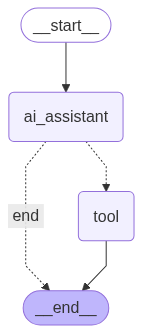

In [31]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [32]:

for s in app.stream({"messages": ["who is upcoming president of USA?"]}):
    print(list(s.values())[0])
    print("----")
     

{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'g5vgpvmb3', 'function': {'arguments': '{"query":"upcoming president of USA"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 82, 'prompt_tokens': 1074, 'total_tokens': 1156, 'completion_time': 0.149090909, 'prompt_time': 0.037170896, 'queue_time': 0.24440293400000002, 'total_time': 0.186261805}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--d84df025-8318-473b-a20b-02497d4f8cd4-0', tool_calls=[{'name': 'search', 'args': {'query': 'upcoming president of USA'}, 'id': 'g5vgpvmb3', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1074, 'output_tokens': 82, 'total_tokens': 1156})]}
----
Selected tool: search
{'messages': [[{'title': '2024 United States presidential election - Wikipedia', 'url': 'https://en.wikipedia.org/wiki/2024_United_States_presidential_election', 'content':

In [33]:
for s in app.stream({"messages": ["what is multiplication of 23 and 46?"]}):
    print(list(s.values())[0])
    print("----")

{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '5xb809rkj', 'function': {'arguments': '{"first_number":23,"second_number":46}', 'name': 'multiply'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 91, 'prompt_tokens': 1079, 'total_tokens': 1170, 'completion_time': 0.165454545, 'prompt_time': 0.037018927, 'queue_time': 0.24374160199999997, 'total_time': 0.202473472}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--52ed0593-a50d-441d-84e4-deebd5649e20-0', tool_calls=[{'name': 'multiply', 'args': {'first_number': 23, 'second_number': 46}, 'id': '5xb809rkj', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1079, 'output_tokens': 91, 'total_tokens': 1170})]}
----
Selected tool: multiply
{'messages': [1058]}
----


In [34]:

for s in app.stream({"messages": ["what is the total amount of money exist over the earth?"]}):
    print(list(s.values())[0])
    print("----")
     

{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'hbf6zpr28', 'function': {'arguments': '{"query":"What is the total amount of money in circulation worldwide?"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 89, 'prompt_tokens': 1079, 'total_tokens': 1168, 'completion_time': 0.161818182, 'prompt_time': 0.116920557, 'queue_time': 1.269211605, 'total_time': 0.278738739}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--77f37362-0887-45c0-8e90-e0dd07ab4b53-0', tool_calls=[{'name': 'search', 'args': {'query': 'What is the total amount of money in circulation worldwide?'}, 'id': 'hbf6zpr28', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1079, 'output_tokens': 89, 'total_tokens': 1168})]}
----
Selected tool: search


Exception: web search discard

### LangGraph supports human-in-the-loop workflows in a number of ways. In this section, we will use LangGraph's interrupt_before functionality to always break the tool node.

In [35]:

from langchain_groq import ChatGroq
llm=ChatGroq(model_name="Gemma2-9b-It")

In [36]:

class AgentState(TypedDict):
    messages: Annotated[list, add_messages]

In [37]:
tavily=TavilySearchResults()


In [38]:
tools = [tavily]


In [39]:
llm_with_tools = llm.bind_tools(tools)


In [40]:

def ai_assistant(state: AgentState):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

In [41]:

memory = MemorySaver()

In [42]:

graph_builder = StateGraph(AgentState)
graph_builder.add_node("ai_assistant", ai_assistant)

tool_node = ToolNode(tools=tools)
graph_builder.add_node("tools", tool_node)

In [47]:

graph_builder.add_edge(START, "ai_assistant")

graph_builder.add_conditional_edges(
    "ai_assistant",
    tools_condition,
)
graph_builder.add_edge("tools", "ai_assistant")
     

Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.
Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.


ValueError: Branch with name `tools_condition` already exists for node `ai_assistant`

In [ ]:

app2 = graph_builder.compile(
    checkpointer=memory,
    # This is new!
    interrupt_before=["tools"],
    # Note: can also interrupt __after__ tools, if desired.
    # interrupt_after=["tools"]
)
     

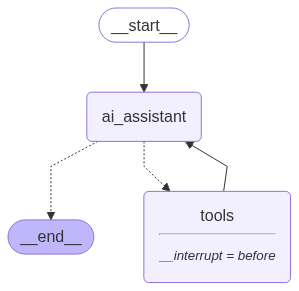

In [ ]:

from IPython.display import Image, display
display(Image(app2.get_graph().draw_mermaid_png()))

In [46]:

user_input = "what is current a capital of india?"
config = {"configurable": {"thread_id": "1"}}

In [48]:

# The config is the **second positional argument** to stream() or invoke()!
events = app2.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)
     

In [49]:
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================ Human Message =================================

what is current a capital of india?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (5wthg33rv)
 Call ID: 5wthg33rv
  Args:
    query: capital of india


In [50]:
snapshot = app2.get_state(config)


In [51]:
snapshot.next


('tools',)

In [52]:
last_message=snapshot.values["messages"][-1]


In [53]:
last_message.tool_calls


[{'name': 'tavily_search_results_json',
  'args': {'query': 'capital of india'},
  'id': '5wthg33rv',
  'type': 'tool_call'}]

In [54]:
# `None` will append nothing new to the current state, letting it resume as if it had never been interrupted
events = app2.stream(None, config, stream_mode="values")

In [55]:

for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (5wthg33rv)
 Call ID: 5wthg33rv
  Args:
    query: capital of india
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "New Delhi - Wikipedia", "url": "https://en.wikipedia.org/wiki/New_Delhi", "content": "Appearance\n\nmove to sidebar hide\n\nCoordinates: 28°36′50″N 77°12′32″E / 28.61389°N 77.20889°E / 28.61389; 77.20889\n\nImage 4: Page semi-protected\n\nFrom Wikipedia, the free encyclopedia\n\nCapital city of India\n\nThis article is about the capital of India, within the union territory of Delhi. For other uses, see New Delhi (disambiguation) \"New Delhi (disambiguation)\"). [...] New Delhi (/ˈ nj uː ˈ d ɛ.l i/ⓘ;( _\\_\\\\_Naī Dillī\\\\_\\__, pronounced( \"Help:IPA/Hindi and Urdu\")) is the capital of India and a part of the National Capital Territory of Delhi (NCT). New Delhi is the seat

In [56]:

user_input = "what is a weather there?"

config = {"configurable": {"thread_id": "1"}}

In [57]:

# The config is the **second positional argument** to stream() or invoke()!
events = app2.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)

In [58]:

for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================ Human Message =================================

what is a weather there?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (4ysz7e0jf)
 Call ID: 4ysz7e0jf
  Args:
    query: weather in New Delhi


In [59]:
snapshot = app2.get_state(config)


In [60]:
snapshot.next


('tools',)

In [61]:
last_message=snapshot.values["messages"][-1]


In [62]:
last_message.tool_calls


[{'name': 'tavily_search_results_json',
  'args': {'query': 'weather in New Delhi'},
  'id': '4ysz7e0jf',
  'type': 'tool_call'}]

In [63]:

# `None` will append nothing new to the current state, letting it resume as if it had never been interrupted
events = app2.stream(None, config, stream_mode="values")
     

In [64]:

for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (4ysz7e0jf)
 Call ID: 4ysz7e0jf
  Args:
    query: weather in New Delhi
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "New Delhi Weather Forecast 5 Jul 2025 - Times of India", "url": "https://timesofindia.indiatimes.com/weather/new-delhi-weather-forecast-today/110011", "content": "New Delhi Weather Forecast 5 Jul 2025 ; UV Index. 8 of 11 ; Humidity. 62 ; Max. Temp. 34 °C ; Min. Temp. 29 °C.", "score": 0.9314689}, {"title": "Warm start at 25.63 °C, check weather forecast for May 7, 2025", "url": "https://qa-www.hindustantimes.com/cities/delhi/delhi-weather-today-aqi-and-rain-forecast-updates-may-7-2025-101746581407243.html", "content": "The temperature in Delhi today, on May 7, 2025, is 30.09 °C. The day's forecast indicates a minimum and maximum temperature of 25.63 °C and", "score": 0.9

In [65]:
app2.get_state(config)


StateSnapshot(values={'messages': [HumanMessage(content='what is current a capital of india?', additional_kwargs={}, response_metadata={}, id='7c5ee157-594a-48aa-8d3e-befb0bd8b50a'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '5wthg33rv', 'function': {'arguments': '{"query":"capital of india"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 88, 'prompt_tokens': 988, 'total_tokens': 1076, 'completion_time': 0.16, 'prompt_time': 0.034140068, 'queue_time': 0.246877812, 'total_time': 0.194140068}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--69e0614f-bdd9-4b0b-976b-23695625013a-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'capital of india'}, 'id': '5wthg33rv', 'type': 'tool_call'}], usage_metadata={'input_tokens': 988, 'output_tokens': 88, 'total_tokens': 1076}), ToolMessage(content='[{"ti

In [66]:
snapshot=app2.get_state(config)


In [67]:

snapshot.next

()

In [68]:
user_input = "give me the recent news of it?"

config = {"configurable": {"thread_id": "1"}}
     

In [69]:
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

In [70]:
snapshot=app2.get_state(config)


In [71]:
current_message = snapshot.values["messages"][-1]


In [72]:
current_message.pretty_print()


================================== Ai Message ==================================

It is 34 degrees Celsius and 29 degrees Celsius.


In [74]:
from langchain_core.messages import AIMessage, ToolMessage


In [75]:
answer = "it is just related to raining which is happing on daily basis"


In [77]:

# new_messages = [
#     ToolMessage(content=answer, tool_call_id=tool_call_id),
#     AIMessage(content=answer),
# ]

In [ ]:
# print(app2.get_state(config).values["messages"][-1:])
